## How to Develop ML Models for Human Activity Recognition

### Activity Recognition Using Smartphones Dataset

Human Activity Recognition, or HAR for short, is the problem of predicting what a person is
doing based on a trace of their movement using sensors. 

A standard human activity recognition dataset is the Activity Recognition Using Smartphones made available in 2012. The data is provided as a single zip file that is about 58 megabytes in size. 

In [1]:
from pandas import read_csv
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	# load input data
	X = load_file(prefix + group + '/X_'+group+'.txt')
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

In [10]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset1/HARDataset/')
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset1/HARDataset/')
	# flatten y
	trainy, testy = trainy[:,0], testy[:,0]
	return trainX, trainy, testX, testy


## Define Models

Next, we can define a list of machine learning models to evaluate on this problem.

We will evaluate the models using default configurations. We are not looking for optimal configurations
of these models at this point, just a general idea of how well sophisticated models with default
configurations perform on this problem. We will evaluate a diverse set of nonlinear and ensemble
machine learning algorithms, specifically:

**Nonlinear Algorithms**:

* k-Nearest Neighbors
* Classification and Regression Tree
* Support Vector Machine
* Naive Bayes

**Ensemble Algorithms**:

* Bagged Decision Trees
* Random Forest
* Extra Trees
* Gradient Boosting Machine

We will define the models and store them in a dictionary that maps the model object to a
short name that will help in analyzing the results. The define models() function below defines
the eight models that we will evaluate.

In [4]:
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
# nonlinear models
  models['knn'] = KNeighborsClassifier(n_neighbors=7)
  models['cart'] = DecisionTreeClassifier()
  models['svm'] = SVC()
  models['bayes'] = GaussianNB()
# ensemble models
  models['bag'] = BaggingClassifier(n_estimators=100)
  models['rf'] = RandomForestClassifier(n_estimators=100)
  models['et'] = ExtraTreesClassifier(n_estimators=100)
  models['gbm'] = GradientBoostingClassifier(n_estimators=100)
  print('Defined %d models' % len(models))
  return models

This function is quite extensible and you can easily update to define any machine learning
models or model configurations you wish.

**Evaluate Models**

The next step is to evaluate the defined models in the loaded dataset. 

This step is divided into the evaluation of a single model and the evaluation of all of the models. We will evaluate a single model by first fitting it on the training dataset, making a prediction on the test dataset, and then evaluating the prediction using a metric. In this case we will use classification accuracy that will capture the performance (or error) of a model given the balance observations across
the six activities (or classes). The evaluate model() function below implements this behavior,
evaluating a given model and returning the classification accuracy as a percentage.


In [5]:
# evaluate a single model
def evaluate_model(trainX, trainy, testX, testy, model):
  # fit the model
  model.fit(trainX, trainy)
  # make predictions
  yhat = model.predict(testX)
  # evaluate predictions
  accuracy = accuracy_score(testy, yhat)
  return accuracy * 100.0

We can now call the evaluate model() function repeatedly for each of the defined model.
The evaluate models() function below implements this behavior, taking the dictionary of
defined models, and returns a dictionary of model names mapped to their classification accuracy.

Because the evaluation of the models may take a few minutes, the function prints the performance
of each model after it is evaluated as some verbose feedback.

In [6]:
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(trainX, trainy, testX, testy, models):
  results = dict()
  for name, model in models.items():
   # evaluate the model
   results[name] = evaluate_model(trainX, trainy, testX, testy, model)
   # show process
   print('>%s: %.3f' % (name, results[name]))
  return results

### Summarize Results

The final step is to summarize the findings. We can sort all of the results by the classification
accuracy in descending order because we are interested in maximizing accuracy. The results
of the evaluated models can then be printed, clearly showing the relative rank of each of the
evaluated models. The summarize results() function below implements this behavior.

In [11]:
# print and plot the results
def summarize_results(results, maximize=True):
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,v) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	print()
	for name, score in mean_scores:
		print('Name=%s, Score=%.3f' % (name, score))


In [12]:
# load dataset
trainX, trainy, testX, testy = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(trainX, trainy, testX, testy, models)
# summarize results
summarize_results(results)

Defined 8 models
>knn: 90.329
>cart: 85.646
>svm: 95.046
>bayes: 77.027
>bag: 90.193
>rf: 92.399
>et: 93.892
>gbm: 93.756

Name=svm, Score=95.046
Name=et, Score=93.892
Name=gbm, Score=93.756
Name=rf, Score=92.399
Name=knn, Score=90.329
Name=bag, Score=90.193
Name=cart, Score=85.646
Name=bayes, Score=77.027


Running the example first loads the train and test datasets. The eight models are then
evaluated in turn, printing the performance for each. Finally, a rank of the models by their
performance on the test set is displayed. We can see that both the ExtraTrees ensemble method
and the Support Vector Machines nonlinear methods achieve a performance of about 94%
accuracy on the test set. This is a great result, exceeding the reported 89% by SVM in the
original paper.

Note: Given the stochastic nature of the algorithm, your specific results may vary. Consider
running the example a few times.

**These results show what is possible given domain expertise in the preparation of the data and
the engineering of domain-specific features**. As such, these results can be taken as a performance
upper-bound of what could be pursued through more advanced methods that **may be able to
automatically learn features as part of fitting the model, such as deep learning methods**. 

Any such advanced methods would be fit and evaluated on the raw data from which the engineered
features were derived. And as such, the performance of machine learning algorithms evaluated
on that data directly may provide an expected lower bound on the performance of any more
advanced methods. We will explore this in the next section.

## How to Develop CNNs for Human Activity Recognition

We will develop a one-dimensional convolutional neural network model (1D
CNN) for the human activity recognition dataset. **Convolutional neural network models were
developed for image classification problems**, where the model learns an internal representation
of a two-dimensional input, in a process referred to as feature learning. 

Although we refer to the model as 1D, **it supports multiple dimensions of input as separate channels**, like the color channels of an image (red, green and blue). This same process can be harnessed on
**one-dimensional sequences of data**, such as in the case of acceleration and gyroscopic data for
human activity recognition. The model **learns to extract features from sequences of observations
and how to map the internal features to different activity types**. 

The benefit of using CNNs for sequence classification is that **they can learn from the raw
time series data directly**, and in turn **do not require domain expertise to manually engineer
input features**. The model can learn an internal representation of the time series data and
ideally achieve comparable performance to models fit on a version of the dataset with engineered
features. 

Human activity recognition is the problem of classifying sequences of accelerometer data
recorded by specialized harnesses or smartphones into known well-defined movements.

**Classical
approaches** to the problem involve **hand crafting features from the time series data based on
fixed-sized windows and training machine learning models, such as ensembles of decision trees**.
The difficulty is that this feature engineering requires deep expertise in the field.

Recently, deep learning methods such as recurrent neural networks and one-dimensional convolutional neural networks, or CNNs, have been shown to provide state-of-the-art results on challenging activity
recognition tasks with little or no data feature engineering, instead using feature learning on raw
data. In this tutorial, you will discover how to develop one-dimensional convolutional neural
networks for time series classification on the problem of human activity recognition. 

The topics we will treat in this case are:

How to load and prepare the data for a standard human activity recognition dataset and
develop a single 1D CNN model that achieves excellent performance on the raw data:

* How to further tune the performance of the model, including data transformation, filter
maps, and kernel sizes.
* How to develop a sophisticated multi-headed one-dimensional convolutional neural network
model that provides an ensemble-like result.


Let’s get started.


## Load Data

The first step is to load the raw dataset into memory.

There are three main signal types in the raw data: total acceleration, body acceleration, and body gyroscope. Each has three axes of data. This means that there are a total of nine variables for each time step. 

Further, each series of data has been partitioned into overlapping windows of 2.65 seconds of data,or 128 time steps.These windows of data correspond to the windows of engineered features (rows).

This means that one row of data has (128 × 9), or 1,152, elements. 

It is likely that there is some redundant data. The signals are stored in the /Inertial Signals/ directory under the train and test subdirectories. Each axis of each signal is stored in a separate file, meaning that each of the train and test datasets have nine input files to load and one output file to load.

We can batch the loading of these files into groups given the consistent directory structures
and file naming conventions. The input data is in CSV format where columns are separated by
whitespace. Each of these files can be loaded as a NumPy array. The load file() function
below loads a dataset given the file path to the file and returns the loaded data as a NumPy
array.

In [26]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [36]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

We can then load all data for a given group (train or test) into a single three-dimensional
NumPy array, where the dimensions of the array are [samples, timesteps, features]. To
make this clearer, there are 128 time steps and nine features, where the number of samples is the
number of rows in any given raw signal data file. The load group() function below implements
this behavior. The dstack() NumPy function allows us to stack each of the loaded 3D arrays
into a single 3D array where the variables are separated on the third dimension (features).

In [37]:
# load a list of files into a 3D array of [samples, timesteps, features]
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

We can use this function to load all input signal data for a given group, such as train or test.
The load dataset group() function below loads all input signal data and the output data for
a single group using the consistent naming conventions between the train and test directories.

In [38]:
#load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

Finally, we can load each of the train and test datasets. The output data is defined as an
integer for the class number. We must one hot encode these class integers so that the data is
suitable for fitting a neural network multiclass classification model. We can do this by calling
the to categorical() Keras function. The load dataset() function below implements this
behavior and returns the train and test X and y elements ready for fitting and evaluating the
defined models.

In [39]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset1/HARDataset/')
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset1/HARDataset/')
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	return trainX, trainy, testX, testy

## Fit and Evaluate Model

Now that we have the data loaded into memory ready for modeling, **we can define, fit, and
evaluate a 1D CNN model**. We can define a function named evaluate model() that takes the
train and test dataset, fits a model on the training dataset, evaluates it on the test dataset, and
returns an estimate of the model’s performance. First, we must define the CNN model using
the Keras deep learning library. The model requires a three-dimensional input with [samples,
timesteps, features].

This is exactly how we have loaded the data, where **one sample is one window of the time
series data, each window has 128 time steps, and a time step has nine variables or features**. 


**The output for the model will be a six-element vector containing the probability of a given window
belonging to each of the six activity types**. These input and output dimensions are required
when fitting the model, and we can extract them from the provided training dataset.

The model is defined as a Sequential Keras model, for simplicity. We will define the model
as having two 1D CNN layers, followed by a dropout layer for regularization, then a pooling
layer. 

It is common to define CNN layers in groups of two in order to give the model a good
chance of learning features from the input data. CNNs learn very quickly, so the **dropout layer**
is intended to help slow down the learning process and hopefully result in a better final model.
**The pooling layer** reduces the learned features to their size, consolidating them to only the
most essential elements. After the CNN and pooling, **the learned features are flattened to one
long vector and pass through a fully connected layer before the output layer used to make a
prediction**. 


**The fully connected layer** ideally provides a buffer between the learned features and
the output with the intent of interpreting the learned features before making a prediction.

For this model, we will use a standard configuration of 64 parallel feature maps and a kernel
size of 3. 

**The feature maps are the number of times the input is processed or interpreted**,
whereas the **kernel size is the number of input time steps considered as the input sequence is
read or processed onto the feature maps**. The efficient Adam version of **stochastic gradient
descent** will be used to optimize the network, and the **categorical cross-entropy loss function**
will be used given that we are learning a multiclass classification problem. 

The definition of the model is listed below.

In [31]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(64, 3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(64, 3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D())
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

The model is fit for a fixed number of epochs, in this case 10, and a batch size of 32 samples
will be used, where 32 windows of data will be exposed to the model before the weights of the
model are updated. 

Once the model is fit, it is evaluated on the test dataset and the accuracy
of the fit model on the test dataset is returned. The complete evaluate model() function is
listed below.

There is nothing special about the network structure or chosen hyperparameters; they are
just a starting point for this problem.

### Summarize scores

We can summarize the sample of scores by calculating and reporting **the mean and standard
deviation of the performance**. 

The mean gives the average accuracy of the model on the dataset, whereas the standard deviation gives the average variance of the accuracy from the mean. The function summarize results() below summarizes the results of a run.


In [32]:
# summarize scores

def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
    

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

We can bundle up the repeated evaluation, gathering of results, and summarization of results
into a main function for the experiment, called run experiment(), listed below. 

By default, the model is evaluated 10 times before the performance of the model is reported.

We cannot judge the skill of the model from a single evaluation. The reason for this is that
**neural networks are stochasti**c, meaning that a different specific model will result when training
the same model configuration on the same data. 

This is a feature of the network in that it gives the model its adaptive ability, but requires a slightly more complicated evaluation of the model.

We will repeat the evaluation of the model multiple times, then summarize the performance of
the model across each of those runs. For example, we can call evaluate model() a total of 10
times. This will result in a population of model evaluation scores that must be summarized.

In [33]:
# run the experiment
run_experiment()

>#1: 89.990
>#2: 86.563
>#3: 87.886
>#4: 90.159
>#5: 89.583
>#6: 90.227
>#7: 91.381
>#8: 90.872
>#9: 91.110
>#10: 90.635
[89.98982310295105, 86.56260371208191, 87.88598775863647, 90.15948176383972, 89.58262801170349, 90.22734761238098, 91.3810670375824, 90.87207317352295, 91.10960364341736, 90.63454270362854]
Accuracy: 89.841% (+/-1.435)


Now that we have seen how to load the data and fit a 1D CNN model, we can investigate
whether we can further lift the skill of the model with some hyperparameter tuning.

### Tuned CNN Model

In this section, we will tune the model in an effort to further improve performance on the
problem. We will look at three main areas

1. Data Preparation
2. Number of Filters
3. Size of Kernel

In the previous section, we did not perform any data preparation. We used the data as-is. Each
of the main sets of data (body acceleration, body gyroscopic, and total acceleration) have been
scaled to the range -1, 1. 

**It is not clear if the data was scaled per-subject or across all subjects**.
One possible transform that may result in an improvement is to standardize the observations
prior to fitting a model.

Standardization refers to shifting the distribution of each variable such that it has a mean of
zero and a standard deviation of 1. 

It really only makes sense if the distribution of each variable
is Gaussian.

We can quickly check the distribution of each variable by plotting a histogram of
each variable in the training dataset. A minor difficulty in this is that the data has been split
into windows of 128 time steps, with a 50% overlap. Therefore, in order to get a fair idea of the
data distribution, we must first remove the duplicated observations (the overlap), then remove
the windowing of the data.

We can do this using NumPy, first slicing the array and only keeping the second half of each
window, then flattening the windows into a long vector for each variable. This is quick and dirty
and does mean that we lose the data in the first half of the first window.

In [ ]:
# remove overlap
#	cut = int(trainX.shape[1] / 2)
#	longX = trainX[:, -cut:, :]

The complete example of loading the data, flattening it, and plotting a histogram for each
of the nine variables is listed below.

In [47]:
from matplotlib import pyplot

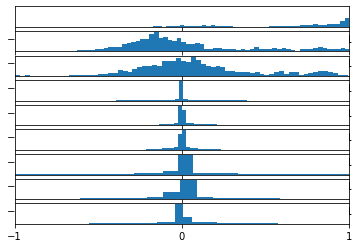

In [48]:
# plot a histogram of each variable in the dataset
def plot_variable_distributions(trainX):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	pyplot.figure()
	for i in range(longX.shape[1]):
		# create figure
		ax = pyplot.subplot(longX.shape[1], 1, i+1)
		ax.set_xlim(-1, 1)
		# create histogram
		pyplot.hist(longX[:, i], bins=100)
		# simplify axis remove clutter
		pyplot.yticks([])
		pyplot.xticks([-1,0,1])
	pyplot.show()

# load data
trainX, trainy, testX, testy = load_dataset()
# plot histograms
plot_variable_distributions(trainX)

Running the example creates a figure with nine histogram plots, **one for each variable in
the training dataset**. The order of the plots matches the order in which the data was loaded,
specifically:

1. Total Acceleration x
2. Total Acceleration y
3. Total Acceleration z
4. Body Acceleration x
5. Body Acceleration y
6. Body Acceleration z
7. Body Gyroscope x
8. Body Gyroscope y
9. Body Gyroscope z

We can see that each variable has a Gaussian-like distribution, except perhaps the first
variable (Total Acceleration x). 

The distributions of total acceleration data is flatter than the
body data, which is more pointed. We could explore using a power transform on the data to
make the distributions more Gaussian, although this is left as an exercise.


**The data is sufficiently Gaussian-like to explore whether a standardization transform will
help the model extract salient signal from the raw observations**. 

The function below named scale data() can be used to standardize the data prior to fitting and evaluating the model.The StandardScaler scikit-learn class will be used to perform the transform. 

It is first fit on the training data (e.g. to find the mean and standard deviation for each variable), then applied to the train and test sets. 

The standardization is optional, so we can apply the process and compare the results to the same code path without the standardization in a controlled experiment.

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
# standardize data
def scale_data(trainX, testX, standardize):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	# flatten train and test
	flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
	flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
	# standardize
	if standardize:
		s = StandardScaler()
		# fit on training data
		s.fit(longX)
		# apply to training and test data
		longX = s.transform(longX)
		flatTrainX = s.transform(flatTrainX)
		flatTestX = s.transform(flatTestX)
	# reshape
	flatTrainX = flatTrainX.reshape((trainX.shape))
	flatTestX = flatTestX.reshape((testX.shape))
	return flatTrainX, flatTestX

We can update the evaluate model() function to take a parameter, then use this parameter
to decide whether or not to perform the standardization.

In [54]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, param):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	# scale data
	trainX, testX = scale_data(trainX, testX, param)
	model = Sequential()
	model.add(Conv1D(64, 3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(64, 3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D())
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

We can also update the run experiment() to repeat the experiment 10 times for each parameter; in this case, only two parameters will be evaluated [False, True] for no standardization
and standardization respectively.

>p=False #1: 89.277
>p=False #2: 89.752
>p=False #3: 87.988
>p=False #4: 92.467
>p=False #5: 89.718
>p=False #6: 90.974
>p=False #7: 91.449
>p=False #8: 91.449
>p=False #9: 90.329
>p=False #10: 91.110
>p=True #1: 92.162
>p=True #2: 90.058
>p=True #3: 90.974
>p=True #4: 92.467
>p=True #5: 91.890
>p=True #6: 93.315
>p=True #7: 90.024
>p=True #8: 91.619
>p=True #9: 92.331
>p=True #10: 91.585
[[89.27723169326782, 89.75229263305664, 87.98778653144836, 92.46691465377808, 89.71835970878601, 90.97387194633484, 91.44893288612366, 91.44893288612366, 90.32914638519287, 91.10960364341736], [92.16151833534241, 90.05768299102783, 90.97387194633484, 92.46691465377808, 91.89005494117737, 93.31523776054382, 90.0237500667572, 91.6185975074768, 92.33118295669556, 91.58466458320618]] [False, True]
Param=False: 90.451% (+/-1.235)
Param=True: 91.642% (+/-0.993)


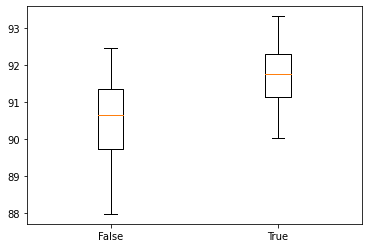

In [55]:
# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%s: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_standardize.png')

# run an experiment
def run_experiment(params, repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p)
			score = score * 100.0
			print('>p=%s #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [False, True]
run_experiment(n_params)

Running the example may take a while, depending on your hardware. 

The performance is printed for each evaluated model. At the end of the run, the performance of each of the tested configurations is summarized showing the mean and the standard deviation. 

We can see that it does look like standardizing the dataset prior to modeling does result in a small lift in performance from about 90.4% accuracy (close to what we saw in the previous section) to about
91.6% accuracy.


**Note**: Given the stochastic nature of the algorithm, your specific results may vary. Consider
running the example a few times.


A **box and whisker plot** of the results is also created. 

This allows the two samples of results to be compared **in a nonparametric way**. 

We can see that the distribution of results with standardization is quite different from
the distribution of results without standardization. **This is likely a real effect**.

### Number of Filters

Now that we have an experimental framework, we can explore varying other hyperparameters
of the model. 

An important hyperparameter for the CNN is **the number of filter maps**. 

We can experiment with a range of different values, from less to many more than the 64 used in the
first model that we developed. Specifically, we will try the following numbers of feature maps:

We can use the same code from the previous section and update the evaluate model()
function to use the provided parameter as the number of filters in the Conv1D layers. 

We can also update the summarize results() function to save the box plot as exp cnn filters.png.
The complete code example is listed below.

>p=8 #1: 89.175
>p=8 #2: 89.277
>p=8 #3: 87.988
>p=8 #4: 85.714
>p=8 #5: 90.499
>p=8 #6: 88.191
>p=8 #7: 89.786
>p=8 #8: 89.277
>p=8 #9: 88.565
>p=8 #10: 85.748
>p=16 #1: 91.211
>p=16 #2: 90.533
>p=16 #3: 89.481
>p=16 #4: 89.074
>p=16 #5: 89.990
>p=16 #6: 90.024
>p=16 #7: 89.481
>p=16 #8: 90.092
>p=16 #9: 88.429
>p=16 #10: 88.904
>p=32 #1: 91.008
>p=32 #2: 90.465
>p=32 #3: 90.499
>p=32 #4: 89.990
>p=32 #5: 90.465
>p=32 #6: 91.211
>p=32 #7: 88.633
>p=32 #8: 90.329
>p=32 #9: 90.227
>p=32 #10: 91.381
>p=64 #1: 92.874
>p=64 #2: 89.311
>p=64 #3: 91.042
>p=64 #4: 90.533
>p=64 #5: 87.038
>p=64 #6: 90.092
>p=64 #7: 91.313
>p=64 #8: 90.126
>p=64 #9: 91.686
>p=64 #10: 89.990
>p=128 #1: 90.431
>p=128 #2: 92.128
>p=128 #3: 88.056
>p=128 #4: 91.245
>p=128 #5: 90.397
>p=128 #6: 89.345
>p=128 #7: 92.637
>p=128 #8: 91.686
>p=128 #9: 91.449
>p=128 #10: 91.551
>p=256 #1: 90.159
>p=256 #2: 92.467
>p=256 #3: 91.415
>p=256 #4: 91.042
>p=256 #5: 91.890
>p=256 #6: 90.838
>p=256 #7: 90.431
>p=256 #8: 91.042
>

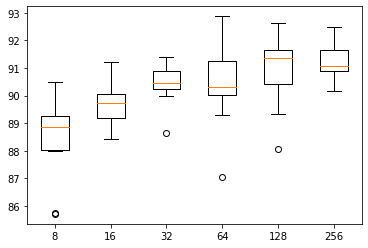

In [56]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_filters):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(n_filters, 3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(n_filters, 3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D())
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_filters.png')

# run an experiment
def run_experiment(params, repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [8, 16, 32, 64, 128, 256]
run_experiment(n_params)

## Size of Kernel

The size of the kernel is another important hyperparameter of the 1D CNN to tune. **The kernel
size controls the number of time steps consider in each read of the input sequence**, that is then
projected onto the feature map (via the convolutional process). 

**A large kernel size means a less rigorous reading of the data**, but may result in a more generalized snapshot of the input. 

We can use the same experimental setup and test a suite of different kernel sizes in addition to the default of three time steps. The full list of values is as follows:

In [57]:
n_params = [2, 3, 5, 7, 11]

Running the example tests each kernel size in turn. 

The results are summarized at the end of the run. We can see a general increase in model performance with the increase in kernel size.

>p=2 #1: 90.363
>p=2 #2: 90.024
>p=2 #3: 90.363
>p=2 #4: 90.533
>p=2 #5: 89.854
>p=2 #6: 89.617
>p=2 #7: 89.888
>p=2 #8: 88.565
>p=2 #9: 89.175
>p=2 #10: 90.397
>p=3 #1: 91.008
>p=3 #2: 90.397
>p=3 #3: 90.804
>p=3 #4: 91.653
>p=3 #5: 90.736
>p=3 #6: 90.465
>p=3 #7: 88.463
>p=3 #8: 90.024
>p=3 #9: 90.940
>p=3 #10: 90.533
>p=5 #1: 92.331
>p=5 #2: 90.601
>p=5 #3: 90.567
>p=5 #4: 90.159
>p=5 #5: 90.397
>p=5 #6: 91.042
>p=5 #7: 89.277
>p=5 #8: 91.245
>p=5 #9: 91.144
>p=5 #10: 90.465
>p=7 #1: 92.229
>p=7 #2: 91.483
>p=7 #3: 91.449
>p=7 #4: 89.684
>p=7 #5: 92.263
>p=7 #6: 92.263
>p=7 #7: 91.042
>p=7 #8: 91.653
>p=7 #9: 90.465
>p=7 #10: 91.381
>p=11 #1: 93.247
>p=11 #2: 93.044
>p=11 #3: 90.770
>p=11 #4: 91.720
>p=11 #5: 91.415
>p=11 #6: 92.229
>p=11 #7: 91.856
>p=11 #8: 90.940
>p=11 #9: 92.433
>p=11 #10: 90.940
[[90.3630793094635, 90.0237500667572, 90.3630793094635, 90.53274393081665, 89.85409140586853, 89.61656093597412, 89.88802433013916, 88.5646402835846, 89.17543292045593, 90.3970122337341

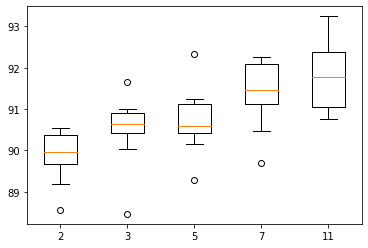

In [58]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy, n_kernel):
	verbose, epochs, batch_size = 0, 15, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(64, n_kernel, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(64, n_kernel, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D())
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_kernel.png')

# run an experiment
def run_experiment(params, repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# test each parameter
	all_scores = list()
	for p in params:
		# repeat experiment
		scores = list()
		for r in range(repeats):
			score = evaluate_model(trainX, trainy, testX, testy, p)
			score = score * 100.0
			print('>p=%d #%d: %.3f' % (p, r+1, score))
			scores.append(score)
		all_scores.append(scores)
	# summarize results
	summarize_results(all_scores, params)

# run the experiment
n_params = [2, 3, 5, 7, 11]
run_experiment(n_params)

The results suggest a kernel size of 5 might be good with a mean skill of about 91.8%, but
perhaps a size of 7 or 11 may also be just as good with a smaller standard deviation.
Note: Given the stochastic nature of the algorithm, your specific results may vary. Consider
running the example a few times.

A box and whisker plot of the results is also created. The results suggest that a larger kernel
size does appear to result in better accuracy and that perhaps a kernel size of 7 provides a good
balance between good performance and low variance.

This is just the beginning of tuning the model, although we have focused on perhaps the
more important elements. 

### Multi-headed CNN Model

Another popular approach with 1D CNNs is to have a multi-headed model, where each head of
the model reads the input time steps using a different sized kernel.

For example, a three-headed model may have three different kernel sizes of 3, 5, 11, allowing the model to read and interpret the sequence data at three different resolutions. The interpretations from all three heads are then concatenated within the model and interpreted by a fully-connected layer before a prediction is made.

We can implement a multi-headed 1D CNN using the Keras functional API. 

We can see that each head of the model is the same structure, although the kernel size
is varied. 

The three heads then feed into a single merge layer before being interpreted prior to
making a prediction.

In [60]:
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.merge import concatenate

In [61]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
 	# head 1
	inputs1 = Input(shape=(n_timesteps,n_features))
	conv1 = Conv1D(64, 3, activation='relu')(inputs1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D()(drop1)
	flat1 = Flatten()(pool1)
	# head 2
	inputs2 = Input(shape=(n_timesteps,n_features))
	conv2 = Conv1D(64, 5, activation='relu')(inputs2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D()(drop2)
	flat2 = Flatten()(pool2)
	# head 3
	inputs3 = Input(shape=(n_timesteps,n_features))
	conv3 = Conv1D(64, 11, activation='relu')(inputs3)
	drop3 = Dropout(0.5)(conv3)
	pool3 = MaxPooling1D()(drop3)
	flat3 = Flatten()(pool3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	dense1 = Dense(100, activation='relu')(merged)
	outputs = Dense(n_outputs, activation='softmax')(dense1)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	# save a plot of the model
	plot_model(model, show_shapes=True, to_file='multiheaded.png')
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit([trainX,trainX,trainX], trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate([testX,testX,testX], testy, batch_size=batch_size, verbose=0)
	return accuracy

# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)

# run the experiment
run_experiment()

>#1: 91.754
>#2: 92.738
>#3: 93.213
>#4: 92.060
>#5: 93.587
>#6: 92.263
>#7: 91.347
>#8: 93.112
>#9: 91.483
>#10: 91.042
[91.75432920455933, 92.73837804794312, 93.21343898773193, 92.05971956253052, 93.58670115470886, 92.2633171081543, 91.34713411331177, 93.11164021492004, 91.48286581039429, 91.0417377948761]
Accuracy: 92.260% (+/-0.827)


When the model is created, a plot of the network architecture is created; provided below, it
gives a clear idea of how the constructed model fits together.

Other aspects of the model could be varied across the heads, such as the number of filters or
even the preparation of the data itself.

Running the example prints the performance of the model each repeat of the experiment and
then summarizes the estimated score as the mean and standard deviation, as we did in the first
case with the simple 1D CNN. 

We can see that the average performance of the model is about
92.2% classification accuracy with a standard deviation of about 0.8. 

This example may be used
as the basis for exploring a variety of other models that vary different model hyperparameters
and even different data preparation schemes across the input heads.

**It would not be an apples-to-apples comparison to compare this result with a single-headed
CNN given the relative tripling of the resources in this model**. Perhaps an apples-to-apples
comparison would be a model with the same architecture and the same number of filters across
each input head of the model.

**Note**: Given the stochastic nature of the algorithm, your specific results may vary. Consider
running the example a few times